<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.955 · TFM</p>
<p style="margin: 0; text-align:right;">2020-1 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# CODI

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import igraph as ig
import xlrd
import csv
import glob
import re
import time

In [ ]:
# FICHERO CON TODO
#files = glob.glob('Correos*.xlsx')
#csv_file = open('CorreosUP.csv', 'w', newline='', encoding='utf-8')
#for file in files:
#    wb = xlrd.open_workbook(file)
#    for i in range(wb.nsheets):
#        sh = wb.sheet_by_index(i)
#        wr = csv.writer(csv_file)
        
#        for rownum in range(sh.nrows):
#            wr.writerow(sh.row_values(rownum))
#csv_file.close()

In [ ]:
# FICHEROS MES A MES
#files = glob.glob('Correos*.xlsx')
#n=1
#for file in files:
#    csv_file = open('CorreosUP'+str(n)+'.csv', 'w', newline='', encoding='utf-8')
#    wb = xlrd.open_workbook(file)
#    for i in range(wb.nsheets):
#        sh = wb.sheet_by_index(i)
#        wr = csv.writer(csv_file)
        
#        for rownum in range(sh.nrows):
#            wr.writerow(sh.row_values(rownum))
            
#    csv_file.close()
#    n+=1

In [2]:
# LECTURA
dft= pd.read_csv('CorreosUP.zip')
dft.columns= ['Emisor','Receptor','FechaEnvio','HoraEnvio','TituloCorreo','AreaEmisor',
             'AreaReceptor','TipoPersonalEmisor','TipoPersonalReceptor']
dft= dft.drop(dft[dft['Emisor']=='Emisor'].index).reset_index(drop=True)
#df1= pd.read_csv('CorreosUP1.csv')
#df1.columns= ['Emisor','Receptor','FechaEnvio','HoraEnvio','TituloCorreo','AreaEmisor',
#             'AreaReceptor','TipoPersonalEmisor','TipoPersonalReceptor']
print(dft.tail())
print(dft.loc[25411,'Receptor'])

                                                     Emisor  \
13815918  FB91F9AD5516E88320C39AFC37D5F94FCFE1B9FF5B88CA...   
13815919  FE0EA37B07A67DE48B51B6431D9A6E4323133AE811B3B5...   
13815920  FE0EA37B07A67DE48B51B6431D9A6E4323133AE811B3B5...   
13815921  FE0EA37B07A67DE48B51B6431D9A6E4323133AE811B3B5...   
13815922  FEBAC72BC6C7E75F14D6EFC84DD8731DAAC3092143E96B...   

                                                   Receptor  FechaEnvio  \
13815918  10A8469086BF4D4F6BC8B9747C0B9C6F125343EFBA4067...  2020-09-30   
13815919  8E4D4CBE02FF4A0A937B951F242F5E9A74EF2506BD4EAF...  2020-09-30   
13815920  C34BC23A0ED0C73D7558432CC1002C630CB31DDEFC56FE...  2020-09-30   
13815921  84175172DDAE8DBE0E9511D521089103C5681917BCBBEF...  2020-09-30   
13815922  FEBAC72BC6C7E75F14D6EFC84DD8731DAAC3092143E96B...  2020-09-30   

         HoraEnvio                                       TituloCorreo  \
13815918  16:40:59                         Re: BROCHURE PMD - URGENTE   
13815919  01:00:59      

In [3]:
# EXPLODE and DATETIME
start=time.time()
dft['Emisor']= dft['Emisor'].str.split(',')
dft['Receptor']= dft['Receptor'].str.split(',')
dft = dft.explode('Emisor')
dft = dft.explode('Receptor')
dft['Emisor']= dft['Emisor'].str[40:]
dft['Receptor']= dft['Receptor'].str[40:]
dft['Fecha']= dft['FechaEnvio']+' '+dft['HoraEnvio']
def ap(datc):
    return dt.datetime.strptime(datc, '%Y-%m-%d %H:%M:%S')
dft['Fecha']= dft['Fecha'].apply(ap)
dft= dft.reset_index(drop=True)
print(time.time()-start)
#dft[['Emisor','Receptor','Fecha','TituloCorreo']].to_csv('o_vertex.csv',index=False)
print(dft)

309.0299689769745
                                             Emisor  \
0              EB1F535935EFC72D4AFBC577@outlook.com   
1           1E9A1A2B0352D5BA0B9B9354@alum.up.edu.pe   
2         B6A785A03BBEC19FF7E73A53@mindpressive.com   
3                D69098AF12B1BC435E71B32B@up.edu.pe   
4               0B21868B4D7E4D9390E03E9C@oechsle.pe   
...                                             ...   
21344731      5B88CA1CFAAA095BDD3EA70F@valor.com.pe   
21344732   11B3B503E4754A150CD55C67@euromonitor.com   
21344733   11B3B503E4754A150CD55C67@euromonitor.com   
21344734         11B3B503E4754A150CD55C67@kayak.com   
21344735    43E96B897FA4821994680A3F@middlebury.edu   

                                            Receptor  FechaEnvio HoraEnvio  \
0         A1F61FE0BE29EBC364C503CB@mailing.up.edu.pe  2019-11-30  15:30:03   
1                 2E8997E5F38013A626C9D021@up.edu.pe  2019-11-30  15:30:27   
2                 07FD0AB0A4B218CC7776090E@up.edu.pe  2019-11-30  15:30:42   
3        

In [4]:
# NODES
# Emisor with info mails
dfemar= dft[(dft['Emisor'].notnull()) & (dft['AreaEmisor'].notnull())]
dfemar= dfemar.drop_duplicates(subset='Emisor').reset_index(drop=True)
dfemar= dfemar[['Emisor','AreaEmisor','TipoPersonalEmisor']]
dfemar= dfemar.rename(columns={'Emisor':'Node','AreaEmisor':'Area','TipoPersonalEmisor':'Tipo'})
#print(dfemar)

# Receptor with info mails
dfrear= dft[(dft['Receptor'].notnull()) & (dft['AreaReceptor'].notnull())]
dfrear= dfrear.drop_duplicates(subset='Receptor').reset_index(drop=True)
dfrear= dfrear[['Receptor','AreaReceptor','TipoPersonalReceptor']]
dfrear= dfrear.rename(columns={'Receptor':'Node','AreaReceptor':'Area','TipoPersonalReceptor':'Tipo'})
#print(dfrear)

# addresses (nodes) with info (Emisor and Receptor)
com= set(dfemar['Node']) - ((set(dfemar['Node']) - set(dfrear['Node'])))
dfrear= dfrear[~dfrear['Node'].isin(com)].reset_index(drop=True)
dfar= dfemar.append(dfrear, ignore_index=True)
#print(dfar)

# Emisor with no info mails
dfemsi= dft[(dft['Emisor'].notnull()) & (dft['AreaEmisor'].isnull())]
dfemsi= dfemsi.drop_duplicates(subset='Emisor').reset_index(drop=True)
dfemsi= dfemsi[['Emisor','AreaEmisor','TipoPersonalEmisor']]
dfemsi= dfemsi.rename(columns={'Emisor':'Node','AreaEmisor':'Area','TipoPersonalEmisor':'Tipo'})
#print(dfemsi)

# Receptor with no info mails
dfresi= dft[(dft['Receptor'].notnull()) & (dft['AreaReceptor'].isnull())]
dfresi= dfresi.drop_duplicates(subset='Receptor').reset_index(drop=True)
dfresi= dfresi[['Receptor','AreaReceptor','TipoPersonalReceptor']]
dfresi= dfresi.rename(columns={'Receptor':'Node','AreaReceptor':'Area','TipoPersonalReceptor':'Tipo'})
#print(dfresi)

# addresses (nodes) with no info
com= set(dfemsi['Node']) - ((set(dfemsi['Node']) - set(dfresi['Node'])))
dfresi= dfresi[~dfresi['Node'].isin(com)].reset_index(drop=True)
dfsi= dfemsi.append(dfresi, ignore_index=True)
#print(dfsi)

# exclude nodes with info from those with no info
com= set(dfar['Node']) - ((set(dfar['Node']) - set(dfsi['Node'])))
dfsi= dfsi[~dfsi['Node'].isin(com)].reset_index(drop=True)
#print(len(dfar))
#print(len(dfsi))

dfex= dfsi[~dfsi['Node'].str.contains('up.edu.pe')].copy()
dfex.loc[:,['Area','Tipo']]= 'EXTERNAL'
#print(dfex)
dfal= dfsi[dfsi['Node'].str.contains('@alum.up.edu.pe')].copy()
dfal.loc[:,['Area','Tipo']]= 'ALUMNO'
#print(dfal)
dfsi= dfsi[dfsi['Node'].str.contains('@up.edu.pe')]
dfsi.loc[:,['Area','Tipo']]= 'UNKNOWN'
#print(dfsi)

dfsw= dfar[~dfar['Node'].str.contains('up.edu.pe')].reset_index(drop=True)
dfin= dfar[dfar['Node'].str.contains('@alum.up.edu.pe')].reset_index(drop=True)
nod= dfar[dfar['Node'].str.contains('@up.edu.pe')].reset_index(drop=True)#.sort_values('Tipo', ascending=False)
# & ~(dfar['Node'].str.contains('@alum.up.edu.pe'))

#dfnodes.to_csv('o_nodes.csv',index=False)
print(nod)
print(dfin)
print(dfsw)

print(dfsi)
print(dfal)
print(dfex)

                                    Node                            Area  \
0     D69098AF12B1BC435E71B32B@up.edu.pe   DPTO. ACAD. DE CS. SOCIALES Y   
1     C2027A124A0732D0C3541E8B@up.edu.pe   DPTO. ACAD. DE ADMINISTRACIÓN   
2     82B49CB309214A59FF2D7BB1@up.edu.pe  GESTIÓN DE LA INFORMACIÓN E IN   
3     515191E869352A1C15B3E373@up.edu.pe   DPTO. ACAD. DE CS. SOCIALES Y   
4     E44B8B38B19C84432308AB37@up.edu.pe               CENTRO DE IDIOMAS   
...                                  ...                             ...   
4610  884F16F79F7F17E9ADCCA251@up.edu.pe            ESCUELA DE POSTGRADO   
4611  7E8BBA10354468F9876904BC@up.edu.pe            ESCUELA DE POSTGRADO   
4612  C48C92190D87C0B74CDE13A8@up.edu.pe      ESCUELA DE GESTIÓN PÚBLICA   
4613  4CA29DAE7A6A66B732FE1471@up.edu.pe  COMUNICACIONES E IMAGEN INSTIT   
4614  9D3C7881F97DAE9AA17D2DBD@up.edu.pe               CENTRO DE IDIOMAS   

                                      Tipo  
0                       PROFESOR PRINCIPAL

In [5]:
# Reducción de tipos a códigos
roldf= pd.read_csv('roles_def.csv', header=None, sep=';', dtype=str)
roldf.columns= ['Tipo','Tipog','Codi']
#print(roldf[100:200])

def tipo(n,r):
    n['Tipog']= np.nan
    n['Codi']= np.nan
    for i in range(len(n)):
        if n.loc[i,'Tipo']=='-':
            n.loc[i,'Tipog']= 'GENERAL SERVICES'
            n.loc[i,'Codi']= '000010'
        else:
            for j in range(len(r)):
                if n.loc[i,'Tipo'].strip()==r['Tipo'][j]:
                    n.loc[i,'Tipog']= r['Tipog'][j]
                    n.loc[i,'Codi']= str(r['Codi'][j])
                    break
    mal= n[n['Codi'].isnull()]
    return(n,mal)

nod,mal= tipo(nod,roldf)
dfin,m= tipo(dfin,roldf)
mal= mal.append(m)
dfsw,m= tipo(dfsw,roldf)
mal= mal.append(m)
#print(mal)

dfinfo= pd.concat([nod,dfin,dfsw]).reset_index(drop=True)

dfinfo.Area[dfinfo['Area'].str.contains('COMUNICACI')]= 'COMUNICACIÓN E IMAGEN INSTITUCIONAL'
print(dfinfo)

areas= set(dfinfo['Area'])
print(len(areas))
print(areas)
tipos= set(dfinfo['Tipog'])
print(len(tipos))
print(tipos)

                                             Node  \
0              D69098AF12B1BC435E71B32B@up.edu.pe   
1              C2027A124A0732D0C3541E8B@up.edu.pe   
2              82B49CB309214A59FF2D7BB1@up.edu.pe   
3              515191E869352A1C15B3E373@up.edu.pe   
4              E44B8B38B19C84432308AB37@up.edu.pe   
...                                           ...   
28559          C96BACA5C7F89CE8DEFBD67C@gmail.com   
28560        47212DC5810AE9BD452AC973@hotmail.com   
28561           47212DC5810AE9BD452AC973@yahoo.es   
28562  6F8DE71EFBDE5D94A1CE1814@qumachocolate.com   
28563          7C0CB6BC129AFA185CA28F46@gmail.com   

                                 Area                                  Tipo  \
0       DPTO. ACAD. DE CS. SOCIALES Y                    PROFESOR PRINCIPAL   
1       DPTO. ACAD. DE ADMINISTRACIÓN  PROFESOR CONTRATADO A TIEMPO PARCIAL   
2      GESTIÓN DE LA INFORMACIÓN E IN           ADMINISTRADOR DE SERVIDORES   
3       DPTO. ACAD. DE CS. SOCIALES Y  PROFESOR

In [6]:
# ARCS
def arcs(tot,ini,fin,nod):
    tot= tot[(tot['Fecha']>=ini) & (tot['Fecha']<fin)]
    tot= tot[(tot['Emisor']==tot['Emisor']) & (tot['Receptor']==tot['Receptor'])]
    tot= tot[tot['Emisor'].isin(nod['Node']) | tot['Receptor'].isin(nod['Node'])].reset_index(drop=True)
    tot= tot[tot['Emisor']!=tot['Receptor']]
    tot= tot[['Emisor','Receptor','Fecha','TituloCorreo']]
    return(tot)

In [7]:
# Matriz Adyacencia/Pesos
def mad(arc,nod,dfin,dfsw,dfsi,dfal):
    am = np.zeros((len(nod)+5,len(nod)+5),dtype=np.bool)
    awm= np.zeros((len(nod)+5,len(nod)+5),dtype=np.uintc)
    #print(am.shape)
    #print(awm.shape)

    start=time.time()
    for i,a in arc.iterrows():
        #print(a)
        if nod['Node'].eq(a.Emisor).any():
            i1= nod[nod['Node']==a.Emisor].index[0]
        elif dfin['Node'].eq(a.Emisor).any():
            i1= len(nod)
        elif dfsw['Node'].eq(a.Emisor).any():
            i1= len(nod)+1
        elif dfsi['Node'].eq(a.Emisor).any():
            i1= len(nod)+2
        elif dfal['Node'].eq(a.Emisor).any():
            i1= len(nod)+3
        else:
            i1= len(nod)+4
    
        if nod['Node'].eq(a.Receptor).any():
            i2= nod[nod['Node']==a.Receptor].index[0]
        elif dfin['Node'].eq(a.Receptor).any():
            i2= len(nod)
        elif dfsw['Node'].eq(a.Receptor).any():
            i2= len(nod)+1
        elif dfsi['Node'].eq(a.Receptor).any():
            i2= len(nod)+2
        elif dfal['Node'].eq(a.Receptor).any():
            i2= len(nod)+3
        else:
            i2= len(nod)+4 

        #print(i,i1,i2)
        am[i1][i2]=1
        awm[i1][i2]+=1

    print(time.time()-start)
    return(am,awm)

In [8]:
# Matrices por Dias
def mdi(dft,ini,nd,nod,dfin,dfsw,dfsi,dfal):
    for i in range(nd):
        day= ini+dt.timedelta(days=i)
        arc= arcs(dft,day,day+dt.timedelta(days=43),nod)
        am,awm= mad(arc,nod,dfin,dfsw,dfsi,dfal)
        #pd.DataFrame(am).to_csv('{}_am.csv'.format(day.date()),index=False)
        #pd.DataFrame(awm).to_csv('{}_awm.csv'.format(day.date()),index=False)
        pd.DataFrame(awm).to_csv('RelaxConf_awm.csv',index=False)
    return(arc,awm)

In [19]:
# DataFrame de treball, nodes personal, alumnes, externs
arc,awm= mdi(dft,dt.datetime(2020,7,1),1,nod,dfin,dfsw,dfsi,dfal)

15843.213992118835


In [ ]:
awm= pd.read_csv('2020-01-04_awm.csv')
a= np.array(awm.values.tolist())
am= np.where(a>0,1,a).tolist()
print(awm)

otd= np.array(am).sum(axis=1)
ind= np.array(am).sum(axis=0)
for i in range(len(otd)):
    print(i,otd[i],ind[i])

In [9]:
# Total Graph List
dini= dt.datetime(2020,1,1)
Glist=[]
start= time.time()
for i in range(274):
    st=time.time()
    d= dini+dt.timedelta(days=i)
    awm= pd.read_csv('{}_awm.zip'.format(d.date()))
    
    #edg=[]
    #wgt=[]
    #l=len(awm)
    #for i in range(l):
    #    for j in range(l):
    #        if awm.iloc[i,j]>0:
    #            #print(awm.iloc[i,j],i)
    #            edg.append((i,j))
    #            wgt.append(awm.iloc[i,j])
    
    A= awm.values
    g= ig.Graph.Adjacency((A>0).tolist())
    #g= ig.Graph(directed=True)
    #g.add_vertices(len(awm))
    #g.add_edges(edg)
    l=list(nod.Node.copy())
    l.append('Alu_In')
    l.append('Ext_In')
    l.append('UNKNOWN')
    l.append('ALUMNO')
    l.append('EXTERNAL')
    g.vs['Label']= l
    l=list(nod.Area.copy())
    l.append('Alu_Ar')
    l.append('Ext_Ar')
    l.append('UNKNOWN')
    l.append('ALUMNO')
    l.append('EXTERNAL')
    g.vs['Area']= l
    l=list(nod.Tipog.copy())
    l.append('Alu_Ti')
    l.append('Ext_Ti')
    l.append('UNKNOWN')
    l.append('ALUMNO')
    l.append('EXTERNAL')
    g.vs['Tipo']= l
    g.es['Peso']= A[A.nonzero()]
    print(time.time()-st)
    Glist.append(g)
print(time.time()-start)

4.6389617919921875
4.2917492389678955
4.455610752105713
4.42358136177063
4.124013662338257
4.3254640102386475
4.134662389755249
4.288633346557617
4.179486036300659
4.251357793807983
4.176661014556885
4.11461877822876
4.152677297592163
4.224389314651489
4.38262677192688
4.051302671432495
4.0951924324035645
4.172514200210571
4.157540321350098
4.066704273223877
4.315641403198242
4.2079832553863525
4.092062711715698
4.059637546539307
4.090624809265137
4.157686948776245
4.081058979034424
4.026234149932861
4.010534286499023
4.1086976528167725
4.12858247756958
4.216281890869141
4.431642532348633
5.376286268234253
4.3471198081970215
4.213657855987549
4.071453809738159
4.0870115756988525
4.124685525894165
4.09736180305481
4.052801847457886
4.168155193328857
4.077147483825684
4.232675075531006
4.146415948867798
4.122959136962891
4.127665996551514
4.033434152603149
4.22762131690979
4.041712760925293
4.14321494102478
4.167829513549805
4.164719820022583
4.154690265655518
4.295883417129517
4.3127593

In [57]:
# 4 Sections reading
awm= pd.read_csv('PreConf_awm.csv')
A= awm.values
gpc= ig.Graph.Adjacency((A>0).tolist())
gpc.es['Peso']= A[A.nonzero()]
l=list(nod.Node.copy())
l.append('Alu_In')
l.append('Ext_In')
l.append('UNKNOWN')
l.append('ALUMNO')
l.append('EXTERNAL')
gpc.vs['Label']= l
l=list(nod.Area.copy())
l.append('Alu_Ar')
l.append('Ext_Ar')
l.append('UNKNOWN')
l.append('ALUMNO')
l.append('EXTERNAL')
gpc.vs['Area']= l
l=list(nod.Tipog.copy())
l.append('Alu_Ti')
l.append('Ext_Ti')
l.append('UNKNOWN')
l.append('ALUMNO')
l.append('EXTERNAL')
gpc.vs['Tipo']= l
print(sum(gpc.es['Peso']))

awm= pd.read_csv('Confin_awm.csv')
A= awm.values
gcc= ig.Graph.Adjacency((A>0).tolist())
gcc.es['Peso']= A[A.nonzero()]
l=list(nod.Node.copy())
l.append('Alu_In')
l.append('Ext_In')
l.append('UNKNOWN')
l.append('ALUMNO')
l.append('EXTERNAL')
gcc.vs['Label']= l
l=list(nod.Area.copy())
l.append('Alu_Ar')
l.append('Ext_Ar')
l.append('UNKNOWN')
l.append('ALUMNO')
l.append('EXTERNAL')
gcc.vs['Area']= l
l=list(nod.Tipog.copy())
l.append('Alu_Ti')
l.append('Ext_Ti')
l.append('UNKNOWN')
l.append('ALUMNO')
l.append('EXTERNAL')
gcc.vs['Tipo']= l
print(sum(gcc.es['Peso']))

awm= pd.read_csv('RelaxConf_awm.csv')
A= awm.values
grc= ig.Graph.Adjacency((A>0).tolist())
grc.es['Peso']= A[A.nonzero()]
l=list(nod.Node.copy())
l.append('Alu_In')
l.append('Ext_In')
l.append('UNKNOWN')
l.append('ALUMNO')
l.append('EXTERNAL')
grc.vs['Label']= l
l=list(nod.Area.copy())
l.append('Alu_Ar')
l.append('Ext_Ar')
l.append('UNKNOWN')
l.append('ALUMNO')
l.append('EXTERNAL')
grc.vs['Area']= l
l=list(nod.Tipog.copy())
l.append('Alu_Ti')
l.append('Ext_Ti')
l.append('UNKNOWN')
l.append('ALUMNO')
l.append('EXTERNAL')
grc.vs['Tipo']= l
print(sum(grc.es['Peso']))

awm= pd.read_csv('SegConf_awm.csv')
A= awm.values
gsc= ig.Graph.Adjacency((A>0).tolist())
gsc.es['Peso']= A[A.nonzero()]
l=list(nod.Node.copy())
l.append('Alu_In')
l.append('Ext_In')
l.append('UNKNOWN')
l.append('ALUMNO')
l.append('EXTERNAL')
gsc.vs['Label']= l
l=list(nod.Area.copy())
l.append('Alu_Ar')
l.append('Ext_Ar')
l.append('UNKNOWN')
l.append('ALUMNO')
l.append('EXTERNAL')
gsc.vs['Area']= l
l=list(nod.Tipog.copy())
l.append('Alu_Ti')
l.append('Ext_Ti')
l.append('UNKNOWN')
l.append('ALUMNO')
l.append('EXTERNAL')
gsc.vs['Tipo']= l
print(sum(gsc.es['Peso']))

for t in tipos:
    print(t,len(nod[nod['Tipog']==t]))

4544856
7211592
2875319
2620206
CAMPUS STAFF 531
INTERN 659
GENERAL SERVICES 834
PROFESSOR 2236
ACADEMIC SERVICES 290
IT STAFF 65


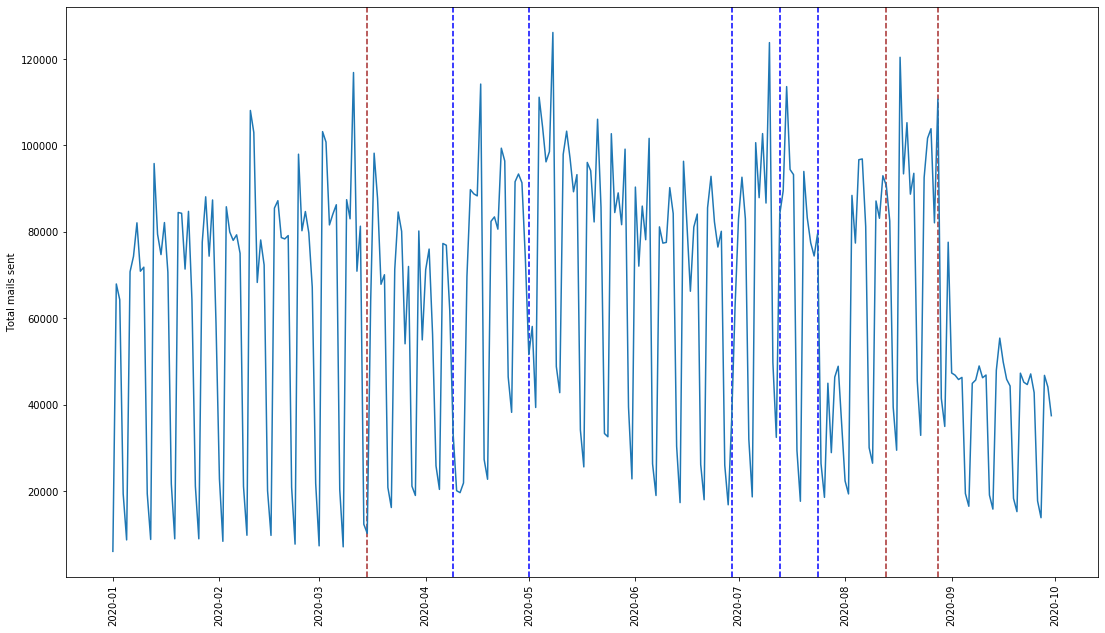

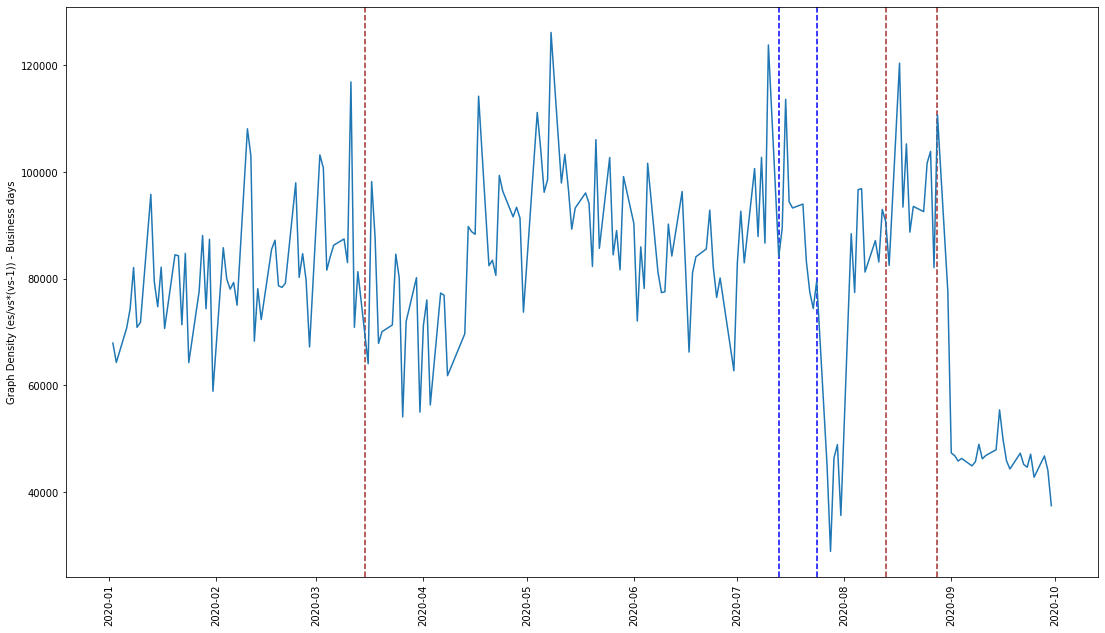

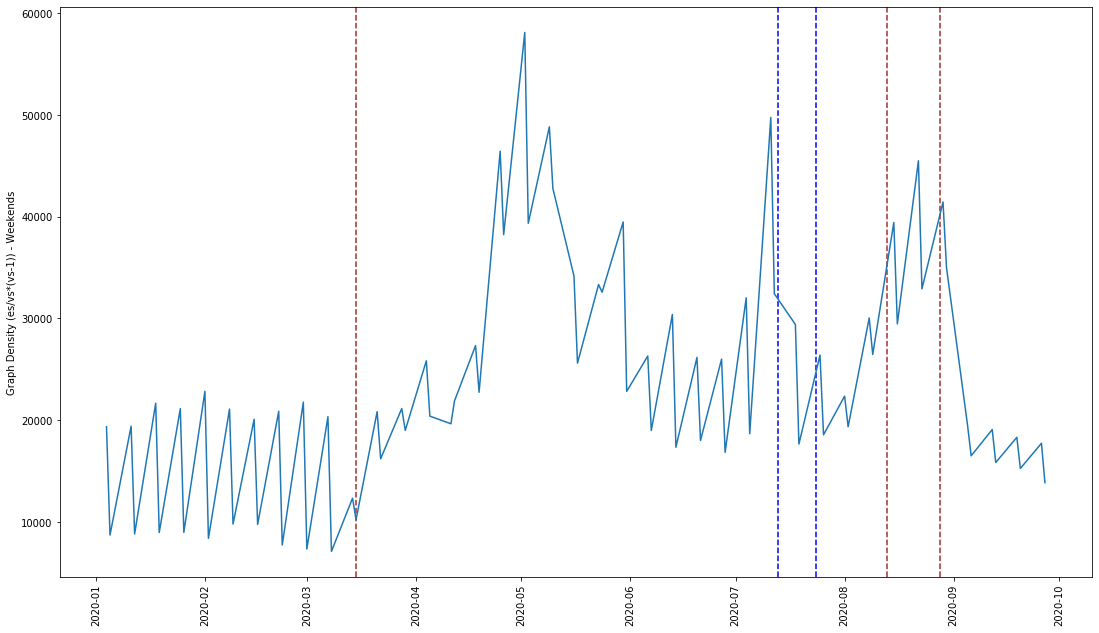

In [12]:
# Total mails sent
pl= pd.DataFrame()
pl['n']= [sum(g.es['Peso']) for g in Glist]
pl['i']=[(dini+dt.timedelta(days=i)).date() for i in range(274)]
pl= pl.set_index(pl.i)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

plt.axvline(x=dt.date(2020,3,15), color='brown', linestyle='--')  #quarantine
#plt.axvline(x=dt.date(2020,3,30), color='blue', linestyle='--')  #init classes
#plt.axvline(x=dt.date(2020,4,2), color='brown', linestyle='--')  #strict confine
plt.axvline(x=dt.date(2020,4,9), color='blue', linestyle='--')  #easter
#plt.axvline(x=dt.date(2020,4,23), color='brown', linestyle='--')  #extension
plt.axvline(x=dt.date(2020,5,1), color='blue', linestyle='--')  #festive
#plt.axvline(x=dt.date(2020,5,8), color='brown', linestyle='--')  #extension
plt.axvline(x=dt.date(2020,6,29), color='blue', linestyle='--')  #festive
#plt.axvline(x=dt.date(2020,7,1), color='brown', linestyle='--')  #relaxation
plt.axvline(x=dt.date(2020,7,13), color='blue', linestyle='--')  #end classes
plt.axvline(x=dt.date(2020,7,24), color='blue', linestyle='--')  #final exams
plt.axvline(x=dt.date(2020,8,13), color='brown', linestyle='--')  #anouncement
plt.axvline(x=dt.date(2020,8,28), color='brown', linestyle='--')  #re-confinement
plt.xticks(rotation=90)
plt.ylabel('Total mails sent')
plt.plot(pl.n)
plt.show()

glb= Glist[0:3]
glf= Glist[3:5]
w= [(dini-dt.timedelta(days=-1)+dt.timedelta(days=i)).date() for i in range(274)]
we=[]
we.append(dt.datetime(2020,1,4))
we.append(dt.datetime(2020,1,5))
for i in range(38):
    for j in range(5):
        glb.append(Glist[7*i+j+5])
    for j in range(2):
        glf.append(Glist[7*i+j+10])
        we.append(w[7*i+j+9])
glb.append(Glist[-3])
glb.append(Glist[-2])
glb.append(Glist[-1])

# Calcul 1dec
#glb= Glist[1:6]
#glf= []
#glf.append(Glist[0])
#w= [(dini-dt.timedelta(days=-1)+dt.timedelta(days=i)).date() for i in range(301)]
#we=[]
#we.append(dini)
#for i in range(42):
#    for j in range(5):
#        glb.append(Glist[7*(i+1)+j+1])
#    for j in range(2):
#        if i<42:
#            glf.append(Glist[7*i+j+6])
#            we.append(w[7*i+j+5])

pl= pd.DataFrame()
pl['n']= [sum(g.es['Peso']) for g in glb]
pl['i']= pd.date_range(start="1/1/2020", end="9/30/2020", freq="B")
pl= pl.set_index(pl.i)
pl= pl.drop([dt.datetime(2020,1,1),dt.datetime(2020,4,9),dt.datetime(2020,4,10),dt.datetime(2020,5,1),dt.datetime(2020,6,29)])

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

plt.axvline(x=dt.date(2020,3,15), color='brown', linestyle='--')  #quarantine
plt.axvline(x=dt.date(2020,7,13), color='blue', linestyle='--')  #end classes
plt.axvline(x=dt.date(2020,7,24), color='blue', linestyle='--')  #final exams
plt.axvline(x=dt.date(2020,8,13), color='brown', linestyle='--')  #anouncement
plt.axvline(x=dt.date(2020,8,28), color='brown', linestyle='--')  #re-confinement
plt.xticks(rotation=90)
plt.ylabel('Graph Density (es/vs*(vs-1)) - Business days')
plt.plot(pl.n)
plt.show()

#### Graph Density (es/vs*(vs-1)) - {} Weekends
pl= pd.DataFrame()
pl['n']= [sum(g.es['Peso']) for g in glf]
pl['i']= we
pl= pl.set_index(pl.i)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

plt.axvline(x=dt.date(2020,3,15), color='brown', linestyle='--')  #quarantine
plt.axvline(x=dt.date(2020,7,13), color='blue', linestyle='--')  #end classes
plt.axvline(x=dt.date(2020,7,24), color='blue', linestyle='--')  #final exams
plt.axvline(x=dt.date(2020,8,13), color='brown', linestyle='--')  #anouncement
plt.axvline(x=dt.date(2020,8,28), color='brown', linestyle='--')  #re-confinement
plt.xticks(rotation=90)
plt.ylabel('Graph Density (es/vs*(vs-1)) - Weekends')
plt.plot(pl.n)
plt.show()

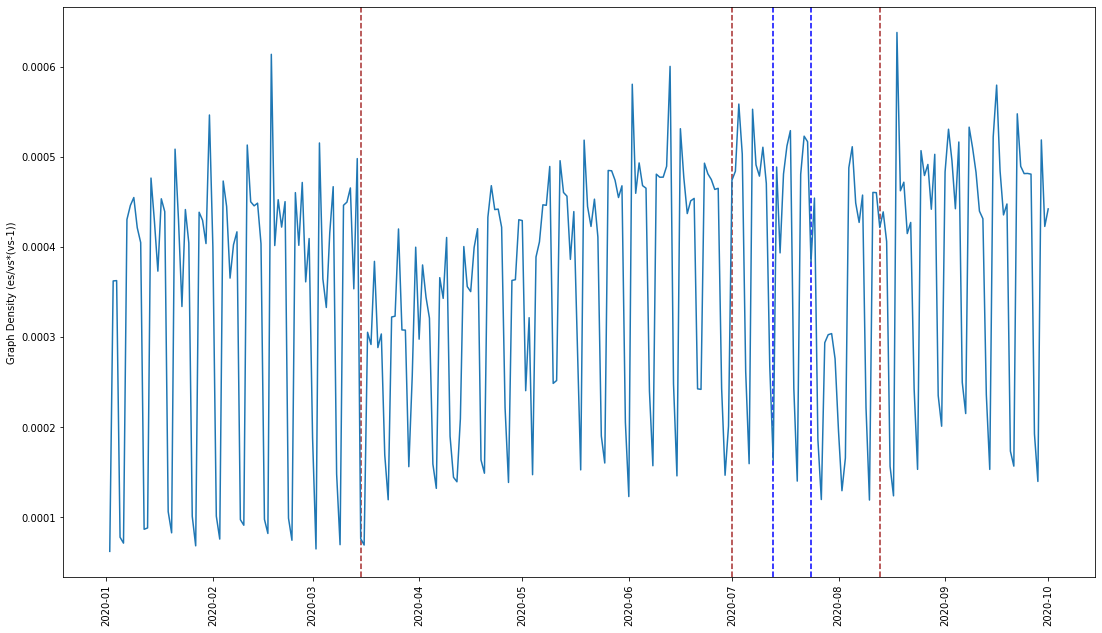

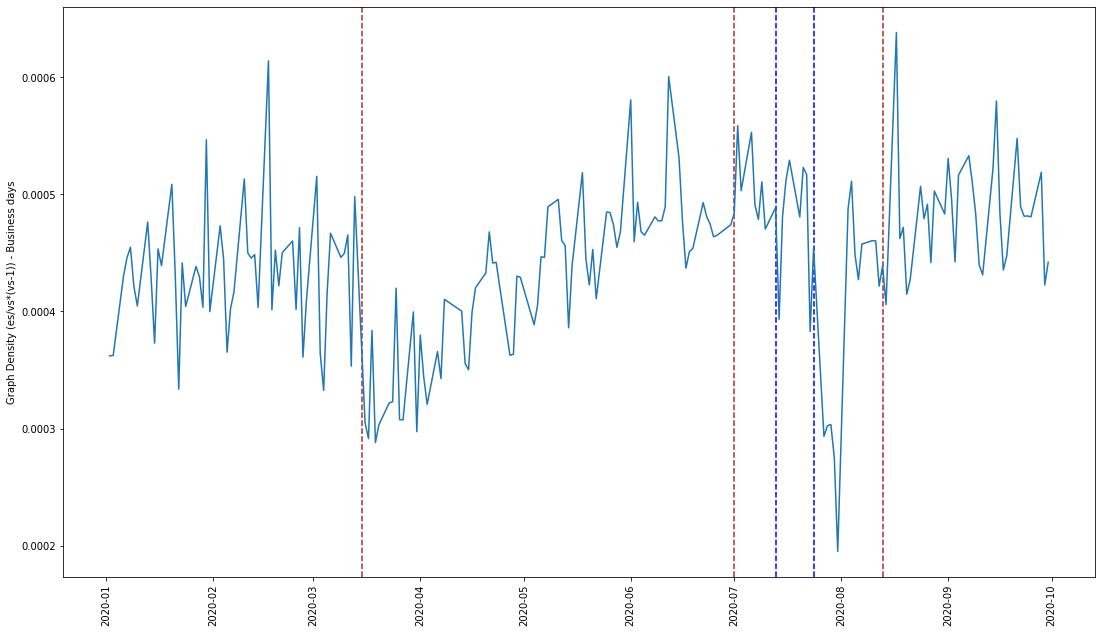

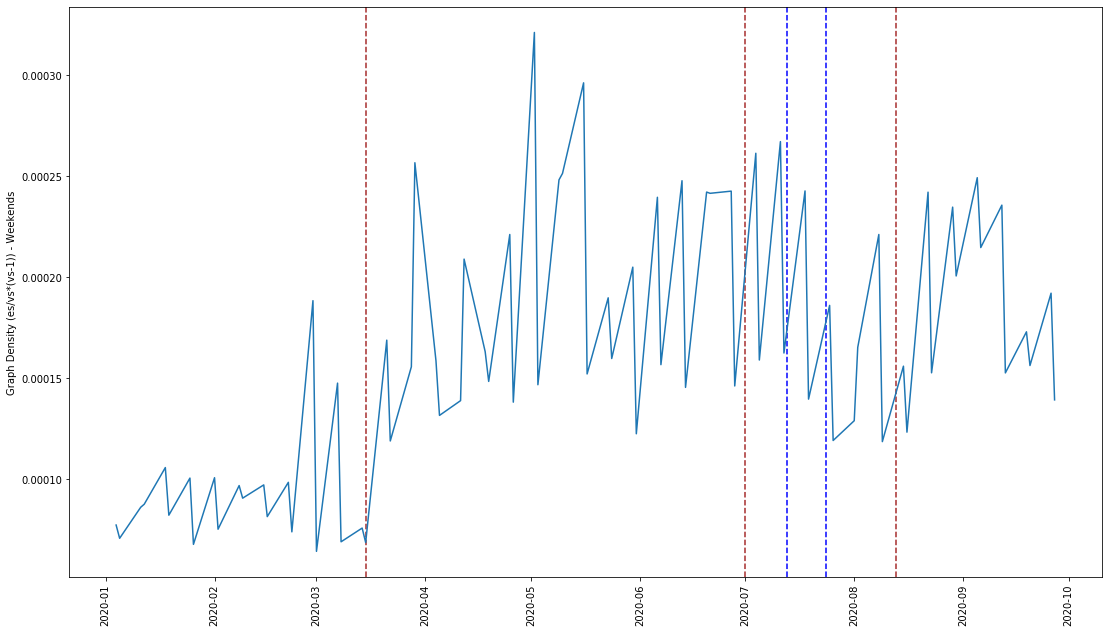

In [13]:
pl= pd.DataFrame()
pl['n']= [len(g.es)/(len(g.vs)*(len(g.vs)-1)) for g in Glist]
pl['i']= w
pl= pl.set_index(pl.i)
#pl= pl.drop([dt.datetime(2020,4,9),dt.datetime(2020,4,10),dt.datetime(2020,5,1),dt.datetime(2020,6,29)])

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

plt.axvline(x=dt.date(2020,3,15), color='brown', linestyle='--')  #quarantine
plt.axvline(x=dt.date(2020,7,1), color='brown', linestyle='--')  #relaxation
plt.axvline(x=dt.date(2020,7,13), color='blue', linestyle='--')  #end classes
plt.axvline(x=dt.date(2020,7,24), color='blue', linestyle='--')  #final exams
plt.axvline(x=dt.date(2020,8,13), color='brown', linestyle='--')  #re-confinement
plt.xticks(rotation=90)
plt.ylabel('Graph Density (es/vs*(vs-1))')
plt.plot(pl.n)
plt.show()

pl= pd.DataFrame()
pl['n']= [len(g.es)/(len(g.vs)*(len(g.vs)-1)) for g in glb]
pl['i']= pd.date_range(start="1/1/2020", end="9/30/2020", freq="B")
pl= pl.set_index(pl.i)
pl= pl.drop([dt.datetime(2020,1,1),dt.datetime(2020,4,9),dt.datetime(2020,4,10),dt.datetime(2020,5,1),dt.datetime(2020,6,29)])

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

plt.axvline(x=dt.date(2020,3,15), color='brown', linestyle='--')  #quarantine
plt.axvline(x=dt.date(2020,7,1), color='brown', linestyle='--')  #relaxation
plt.axvline(x=dt.date(2020,7,13), color='blue', linestyle='--')  #end classes
plt.axvline(x=dt.date(2020,7,24), color='blue', linestyle='--')  #final exams
plt.axvline(x=dt.date(2020,8,13), color='brown', linestyle='--')  #re-confinement
plt.xticks(rotation=90)
plt.ylabel('Graph Density (es/vs*(vs-1)) - Business days')
plt.plot(pl.n)
plt.show()

#### Graph Density (es/vs*(vs-1)) - {} Weekends
pl= pd.DataFrame()
pl['n']= [len(g.es)/(len(g.vs)*(len(g.vs)-1)) for g in glf]
pl['i']= we
pl= pl.set_index(pl.i)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

plt.axvline(x=dt.date(2020,3,15), color='brown', linestyle='--')  #quarantine
plt.axvline(x=dt.date(2020,7,1), color='brown', linestyle='--')  #relaxation
plt.axvline(x=dt.date(2020,7,13), color='blue', linestyle='--')  #end classes
plt.axvline(x=dt.date(2020,7,24), color='blue', linestyle='--')  #final exams
plt.axvline(x=dt.date(2020,8,13), color='brown', linestyle='--')  #re-confinement
plt.xticks(rotation=90)
plt.ylabel('Graph Density (es/vs*(vs-1)) - Weekends')
plt.plot(pl.n)
plt.show()

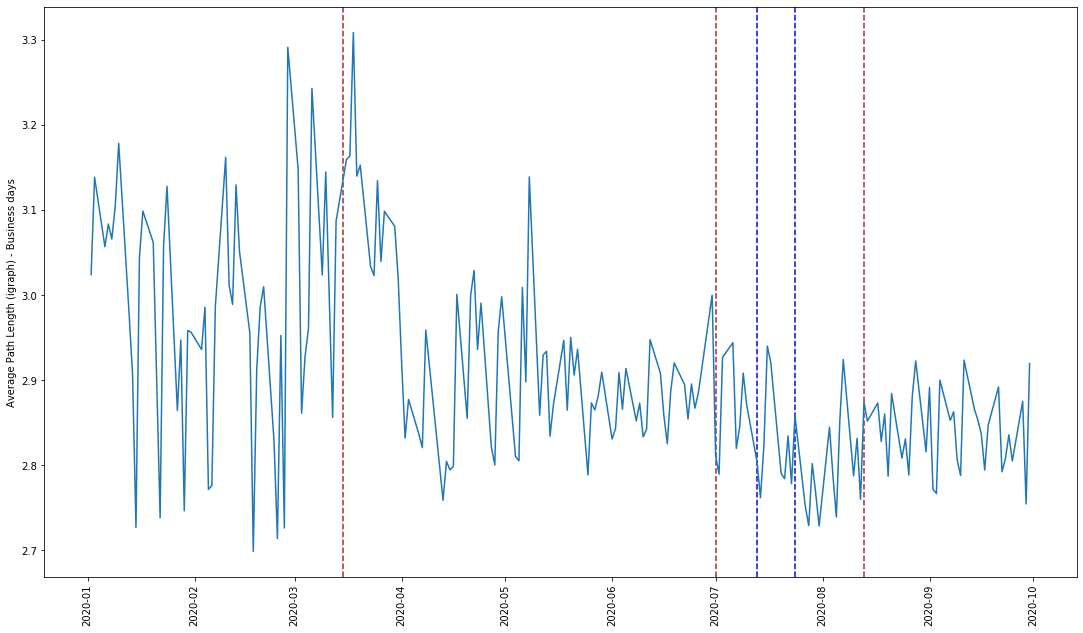

In [14]:
#### Avrg Path Length
pl= pd.DataFrame()
pl['n']= [g.average_path_length() for g in glb]
pl['i']=pd.date_range(start="1/1/2020", end="9/30/2020", freq="B")
pl= pl.set_index(pl.i)
pl= pl.drop([dt.datetime(2020,1,1),dt.datetime(2020,4,9),dt.datetime(2020,4,10),dt.datetime(2020,5,1),dt.datetime(2020,6,29)])

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

plt.axvline(x=dt.date(2020,3,15), color='brown', linestyle='--')  #quarantine
plt.axvline(x=dt.date(2020,7,1), color='brown', linestyle='--')  #relaxation
plt.axvline(x=dt.date(2020,7,13), color='blue', linestyle='--')  #end classes
plt.axvline(x=dt.date(2020,7,24), color='blue', linestyle='--')  #final exams
plt.axvline(x=dt.date(2020,8,13), color='brown', linestyle='--')  #re-confinement
plt.xticks(rotation=90)
plt.ylabel('Average Path Length (igraph) - Business days')
plt.plot(pl.n)
plt.show()

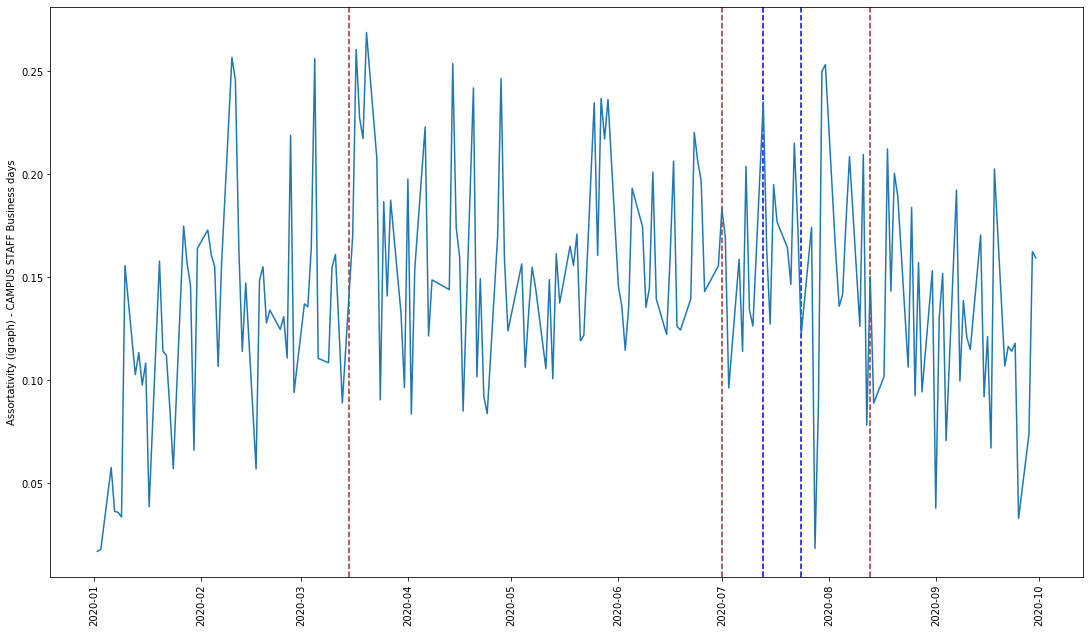

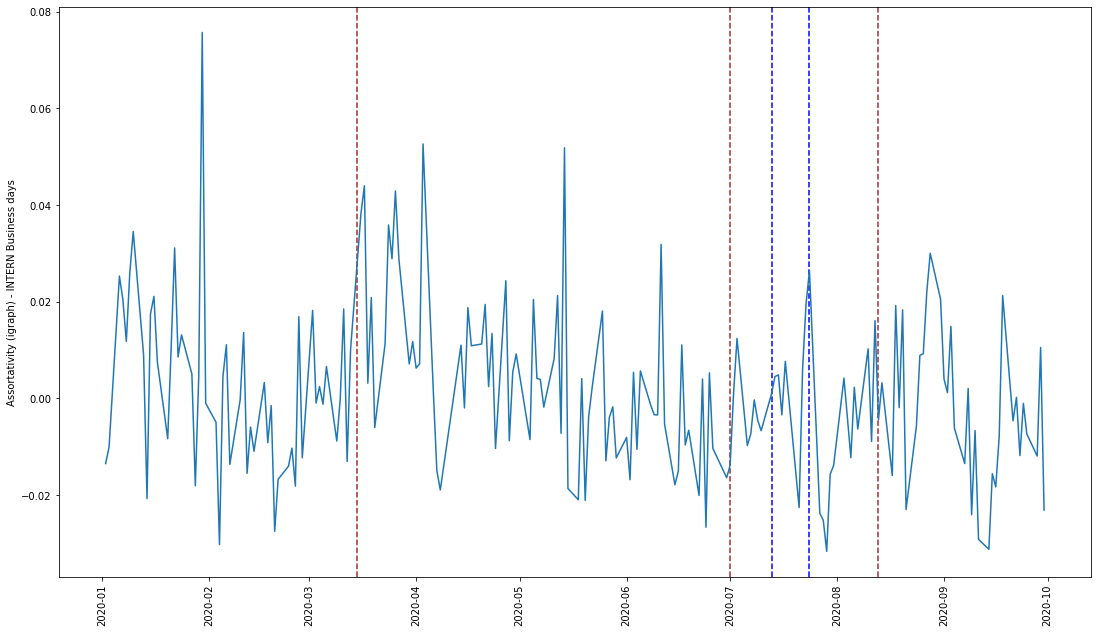

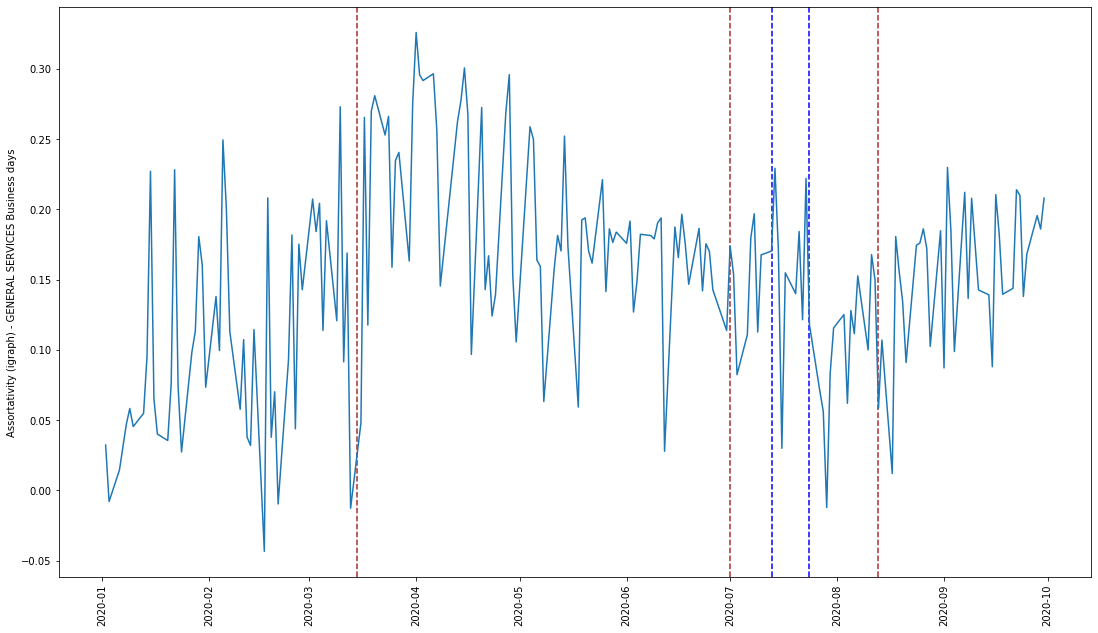

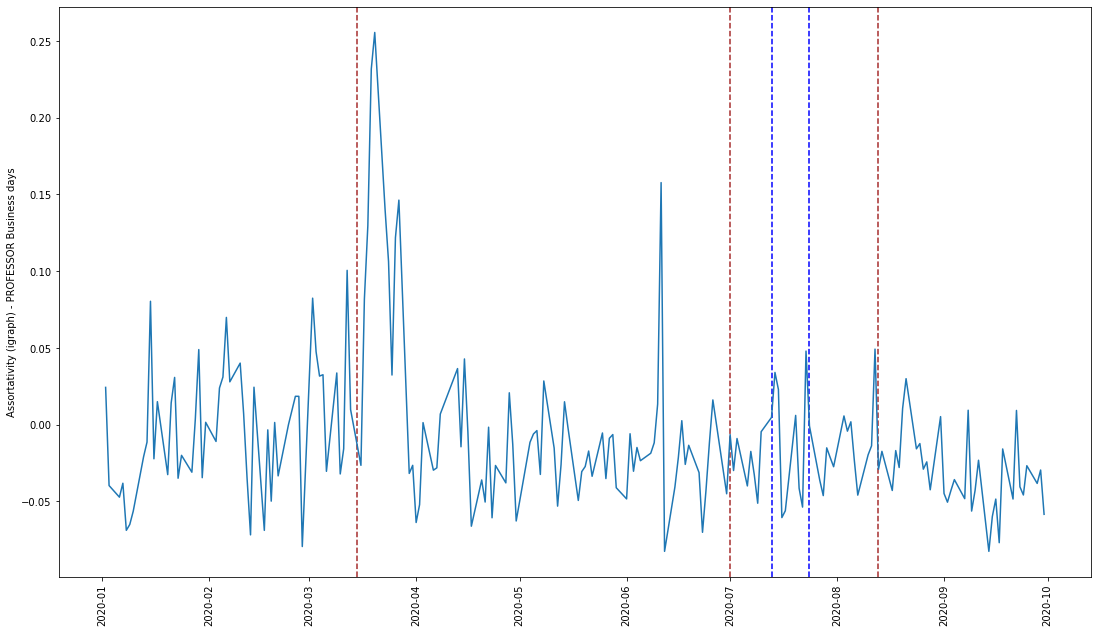

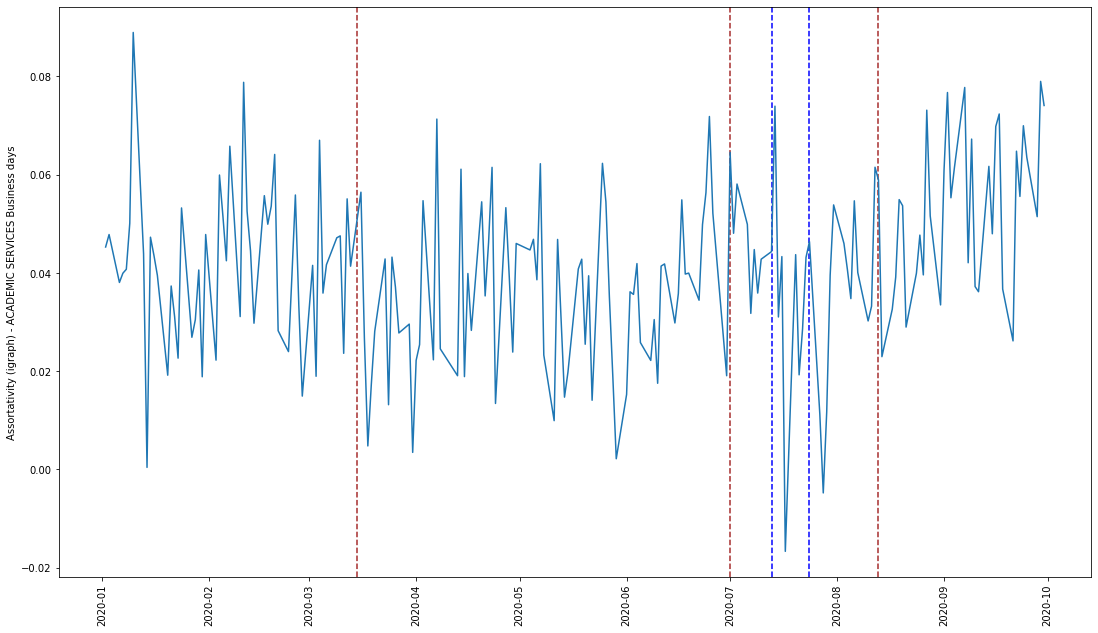

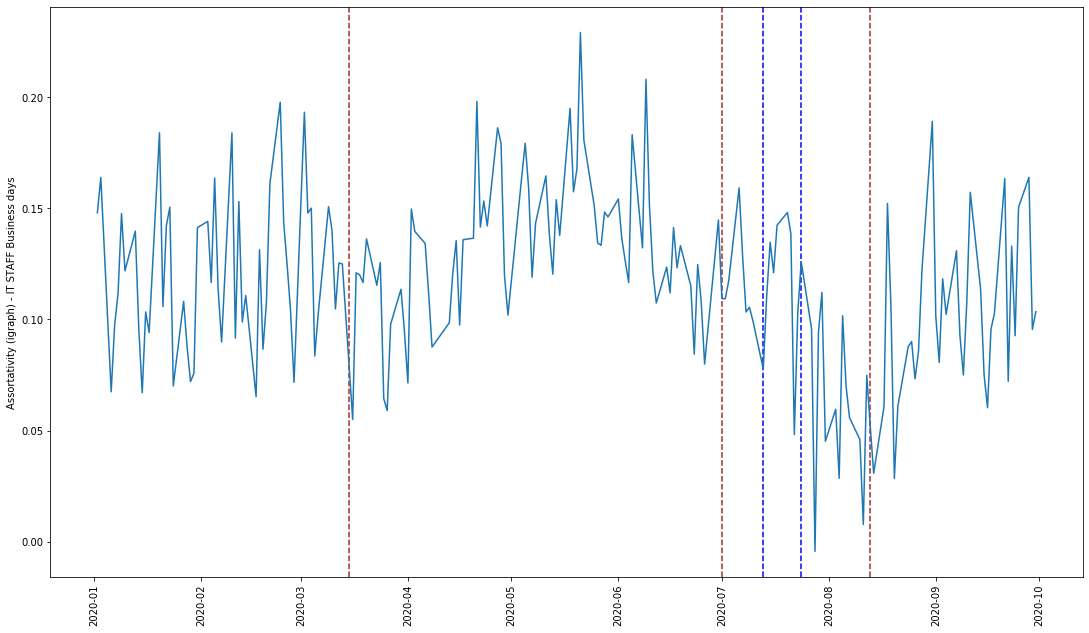

In [15]:
#### Assortativity
for tip in tipos:
    pl= pd.DataFrame()
    vm=[]
    for i in range(len(g.vs)):
        if g.vs['Tipo'][i]== tip:
            vm.append(1)
        else:
            vm.append(0)
    pl['n']= [g.assortativity(types1=vm, directed=True) for g in glb]
    pl['i']=pd.date_range(start="1/1/2020", end="9/30/2020", freq="B")
    pl= pl.set_index(pl.i)
    pl= pl.drop([dt.datetime(2020,1,1),dt.datetime(2020,4,9),dt.datetime(2020,4,10),dt.datetime(2020,5,1),dt.datetime(2020,6,29)])

    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(18.5, 10.5)

    plt.axvline(x=dt.date(2020,3,15), color='brown', linestyle='--')  #quarantine
    plt.axvline(x=dt.date(2020,7,1), color='brown', linestyle='--')  #relaxation
    plt.axvline(x=dt.date(2020,7,13), color='blue', linestyle='--')  #end classes
    plt.axvline(x=dt.date(2020,7,24), color='blue', linestyle='--')  #final exams
    plt.axvline(x=dt.date(2020,8,13), color='brown', linestyle='--')  #re-confinement
    plt.xticks(rotation=90)
    plt.ylabel('Assortativity (igraph) - {} Business days'.format(tip))
    plt.plot(pl.n)
    plt.show()

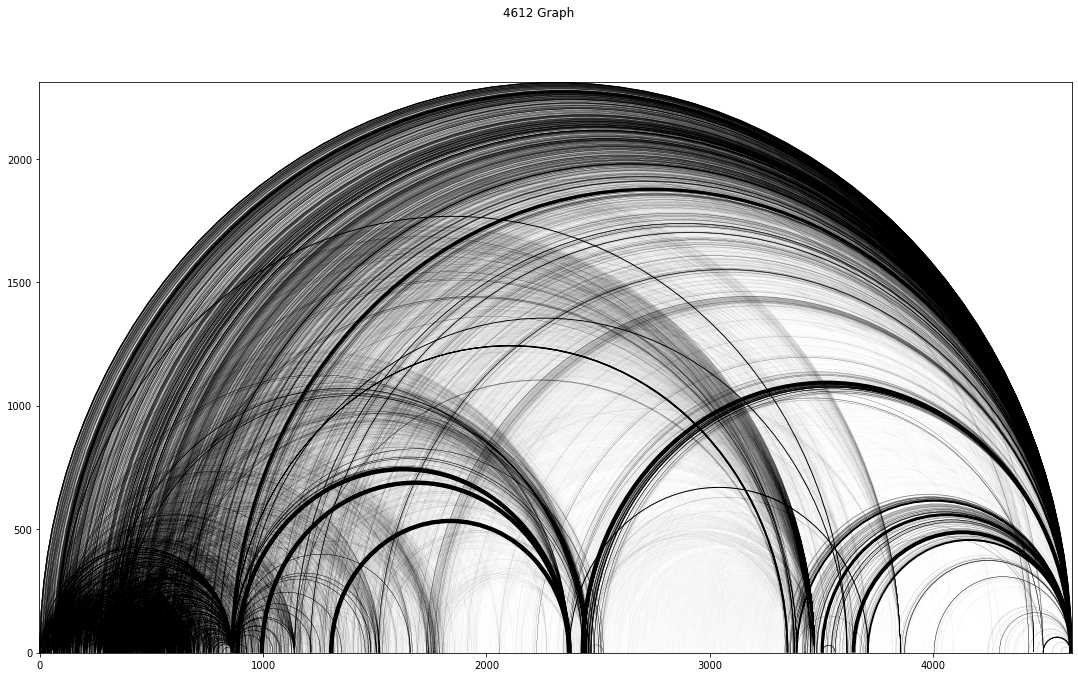

142.15894770622253


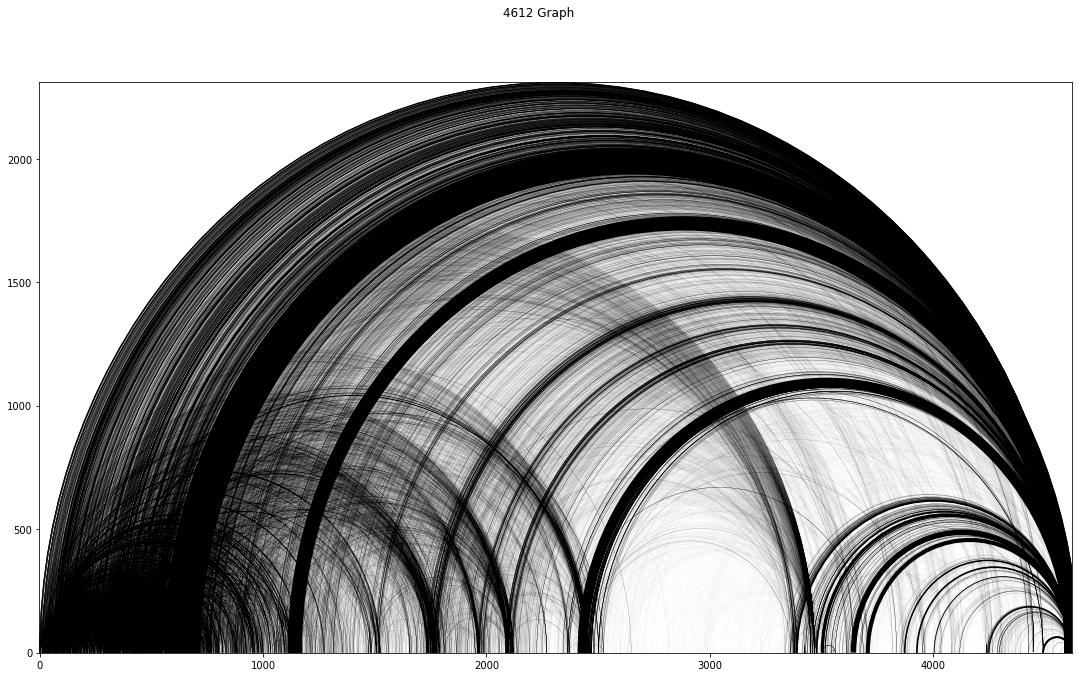

172.0381019115448


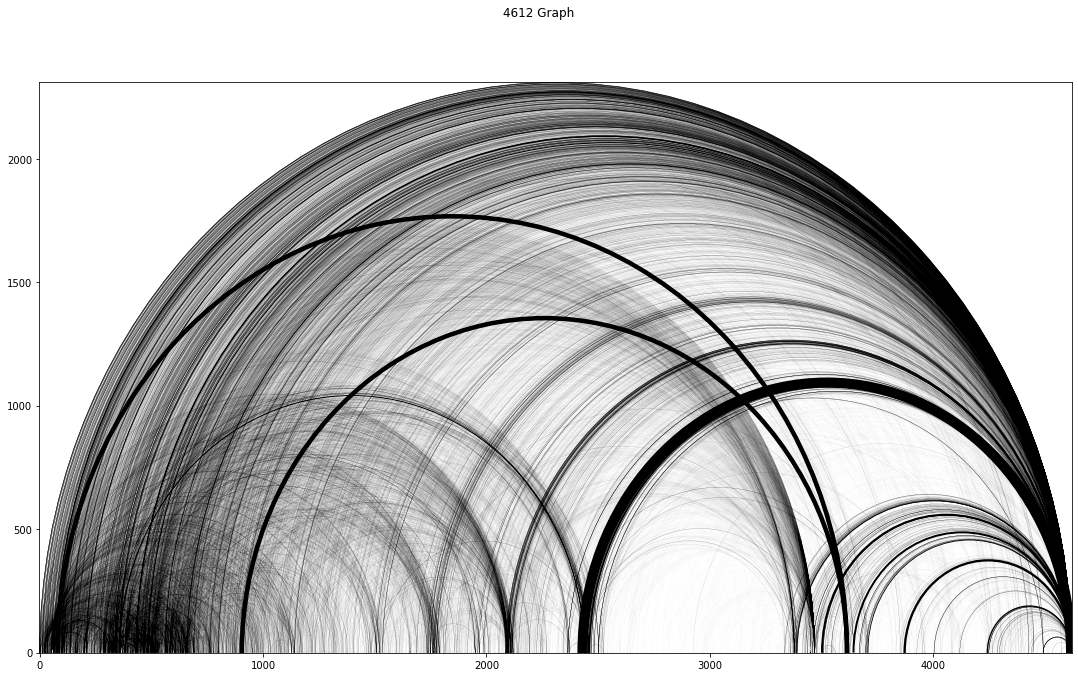

110.12779116630554


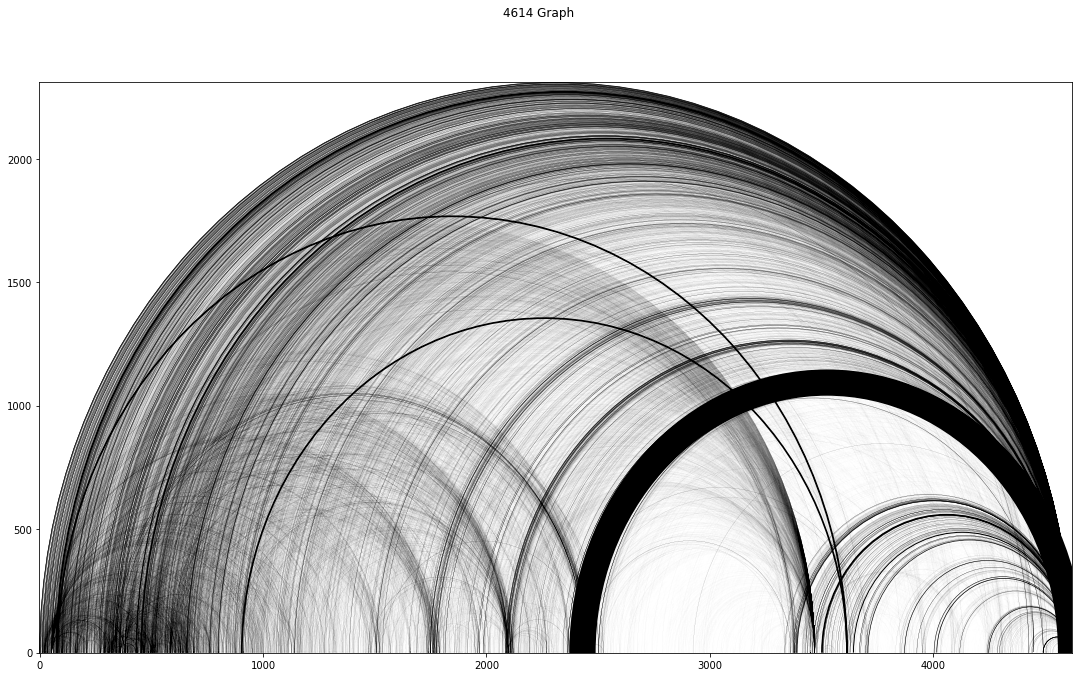

109.49278497695923


In [52]:
# Graph Arc Plot
from matplotlib import patches

def carc (x1,y1,x2,y2):    # calculate the arc
    mxmy = mx, my = [(x1 + x2) / 2, (y1 + y2) / 2]
    r = np.sqrt((x1 - mx)**2 + (y1 - my)**2)
    width = 2 * r
    height = 2 * r
    start_angle = np.arctan2(y1 - my, x1 - mx) * 180 / np.pi
    end_angle = np.arctan2(my - y2, mx - x2) * 180 / np.pi
    return (mxmy, width, height, start_angle, end_angle)

def arg(g,tit):
    start=time.time()
    lines=[]
    for e in g.es:
        s,t= e.source, e.target
        if s!=t:
            mxmy, width, height, start_angle, end_angle= carc(s,0,t,0)
            #print(mxmy, width, height, start_angle, end_angle,e['Peso']/50)
            lines.append(patches.Arc(mxmy, width, height, start_angle, end_angle, lw=e['Peso']/10000))

    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(18.5, 10.5)
    for l in lines:
        ax.add_patch(l)
    ax.set_xlim(-1, len(g.vs)+.1) # you need to set the appropriate limits explicitly!
    ax.set_ylim(-1, len(g.vs)/2+1)
    fig.suptitle('{} Graph'.format(tit))
    #plt.xticks(range(len(g.vs)),nod['Node'],rotation=90,size=11)
    plt.show()
    print(time.time()-start)

arg(gpc,'Pre-confinement')
arg(gcc,'Confinement')
arg(grc,'Relaxation')
arg(gsc,'Second confinement')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
547.4114904403687


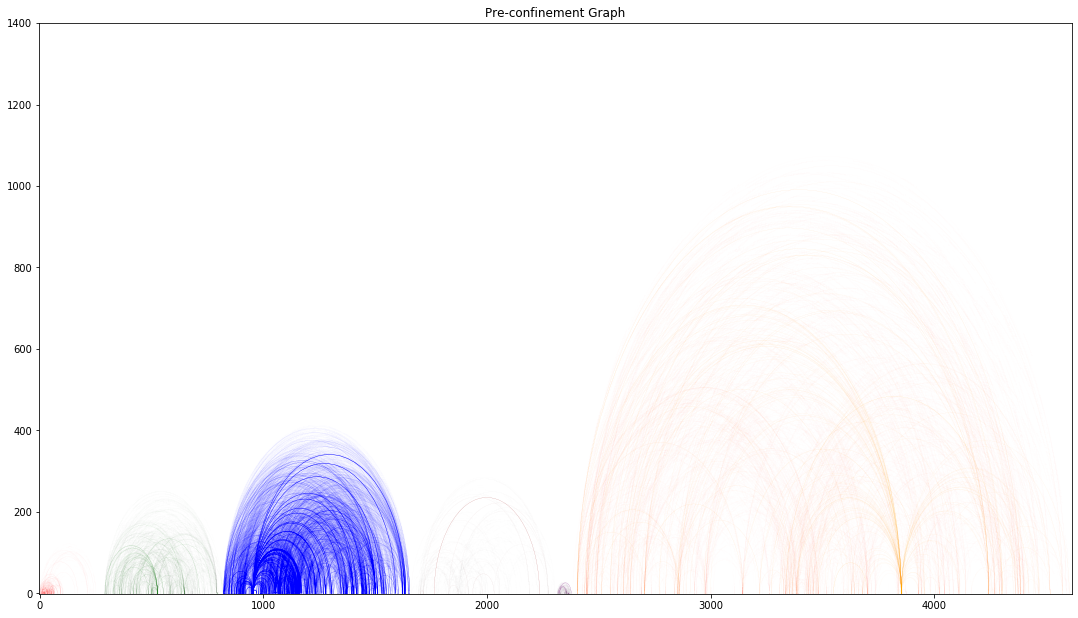

53.26848840713501
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
456.5914657115936


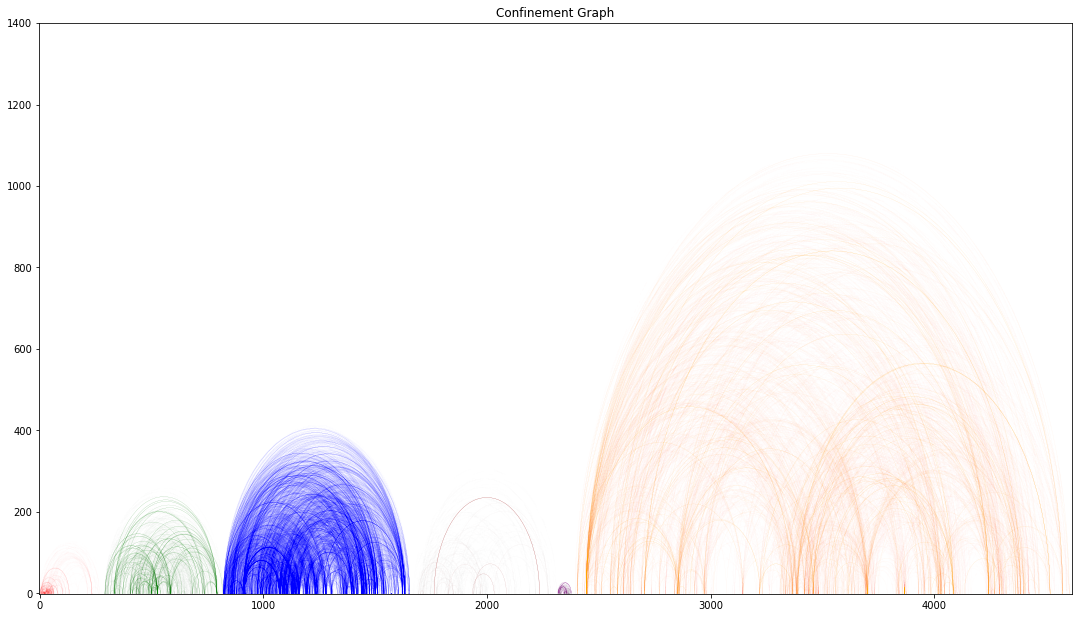

60.10864067077637
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
436.4290990829468


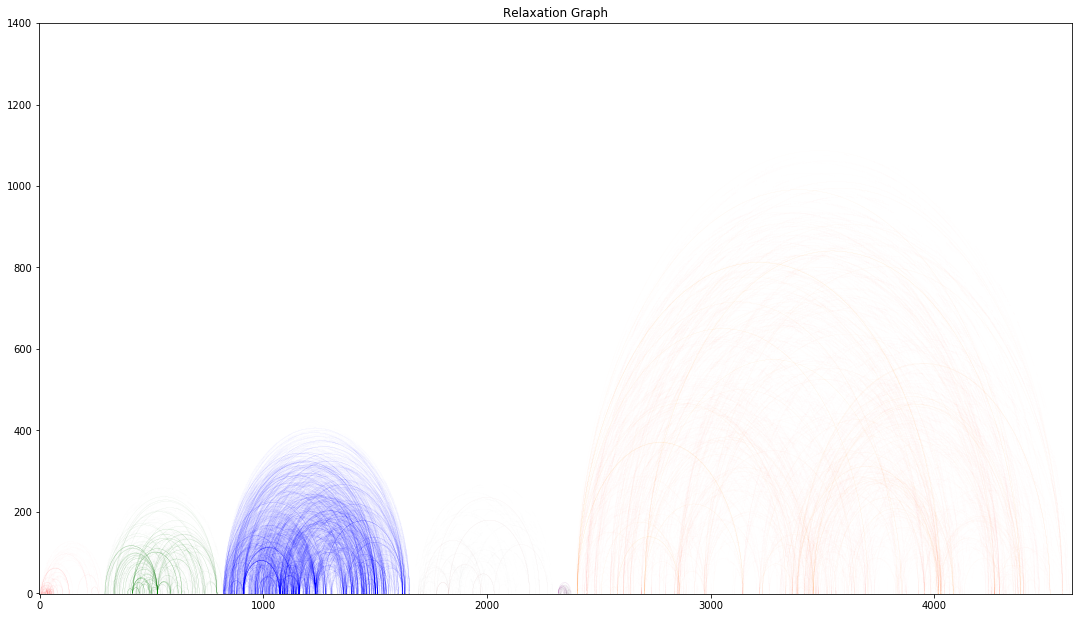

33.63728094100952
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
463.46801924705505


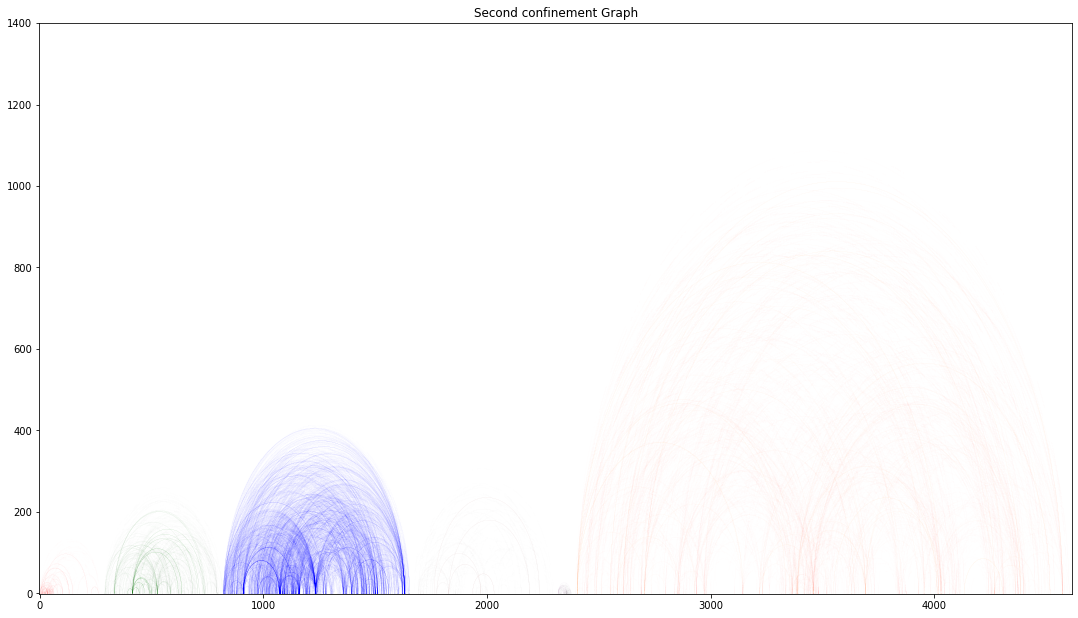

33.13643002510071


In [58]:
# Sorted Graph Arc Plot
from matplotlib import patches

def carc (x1,y1,x2,y2):    # calculate the arc
    mxmy = mx, my = [(x1 + x2) / 2, (y1 + y2) / 2]
    r = np.sqrt((x1 - mx)**2 + (y1 - my)**2)
    width = 2 * r
    height = 2 * r
    start_angle = np.arctan2(y1 - my, x1 - mx) * 180 / np.pi
    end_angle = np.arctan2(my - y2, mx - x2) * 180 / np.pi
    return (mxmy, width, height, start_angle, end_angle)

def args(g,tit):
    start=time.time()
    for i in range(5):
        g.delete_vertices(len(g.vs)-1)
    for i in range(len(g.vs)):
        if i%1000==0:
            print(i)
        for j in range(len(g.vs)-i):
            if g.vs['Tipo'][i]>g.vs['Tipo'][i+j]:
                ls= list(range(4615))
                a=ls[i]
                ls[i]=ls[i+j]
                ls[i+j]=a
                g=g.permute_vertices(ls)
#be=0
#for i in range(len('tipos')):
#    bi=be
#    while g.vs['Tipo'][be] == g.vs['Tipo'][be+1]:
#        be+=1
#    for j in range(be-bi):
#        for k in range(be-bi-j):
#            if g.vs[bi+j].degree() > g.vs[bi+j+k].degree():
#                ls= list(range(len(g.vs)))
#                a=ls[bi+j]
#                ls[bi+j]=ls[bi+j+k]
#                ls[bi+j+k]=a
#                g=g.permute_vertices(ls)

    lines=[]
    for e in g.es:
        s,t= e.source, e.target
        if s!=t:
            mxmy, width, height, start_angle, end_angle= carc(s,0,t,0)
            #print(mxmy, width, height, start_angle, end_angle,e['Peso']/50)
            if g.vs['Tipo'][s] == g.vs['Tipo'][t]:
                if g.vs['Tipo'][s]=='ACADEMIC SERVICES':
                    lines.append(patches.Arc(mxmy, width, height, start_angle, end_angle, lw=e['Peso']/10000, color='r'))
                elif g.vs['Tipo'][s]=='CAMPUS STAFF':
                    lines.append(patches.Arc(mxmy, width, height, start_angle, end_angle, lw=e['Peso']/10000, color='g'))
                elif g.vs['Tipo'][s]=='GENERAL SERVICES':
                    lines.append(patches.Arc(mxmy, width, height, start_angle, end_angle, lw=e['Peso']/10000, color='b'))
                elif g.vs['Tipo'][s]=='INTERN':
                    lines.append(patches.Arc(mxmy, width, height, start_angle, end_angle, lw=e['Peso']/10000, color='brown'))
                elif g.vs['Tipo'][s]=='IT STAFF':
                    lines.append(patches.Arc(mxmy, width, height, start_angle, end_angle, lw=e['Peso']/10000, color='purple'))
                elif g.vs['Tipo'][s]=='PROFESSOR':
                    lines.append(patches.Arc(mxmy, width, height, start_angle, end_angle, lw=e['Peso']/10000, color='orange'))
            #else:
                #lines.append(patches.Arc(mxmy, width, height, start_angle, end_angle, lw=e['Peso']/10000, color='grey'))

    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(18.5, 10.5)
    for l in lines:
        ax.add_patch(l)
    ax.set_xlim(-1, len(g.vs)+.1)
    ax.set_ylim(-1, 1400) #len(g.vs)/2+1)
    #plt.xticks(range(len(g.vs)),nod['Node'],rotation=90,size=11)
    plt.title('{} Graph'.format(tit))
    plt.show()
    print(time.time()-start)
    
#CAMPUS STAFF 531
#INTERN 659
#GENERAL SERVICES 834
#PROFESSOR 2236
#ACADEMIC SERVICES 290
#IT STAFF 65

args(gpc.copy(),'Pre-confinement')
args(gcc.copy(),'Confinement')
args(grc.copy(),'Relaxation')
args(gsc.copy(),'Second confinement')

['CAMPUS STAFF', 'INTERN', 'GENERAL SERVICES', 'PROFESSOR', 'ACADEMIC SERVICES', 'IT STAFF']
['ACADEMIC SERVICES', 'CAMPUS STAFF', 'GENERAL SERVICES', 'INTERN', 'IT STAFF', 'PROFESSOR']


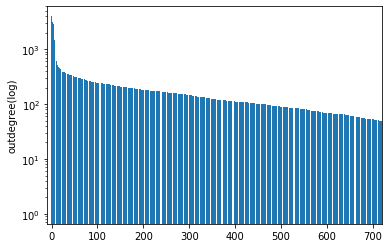

2.356537710930378


In [21]:
so= sorted(gpc.degree(), reverse=True)
t=list(tipos)
print(t)
for i in range(len(t)):
    for j in range(len(t)-i):
        if t[i]>t[i+j]:
            a=t[i]
            t[i]=t[i+j]
            t[i+j]=a
print(t)
plt.bar(list(range(4620)),so)
plt.xlim([-10,720])
plt.yscale('log')
plt.ylabel('outdegree(log)')
plt.show()
#print(g.degree_distribution())
print(g.average_path_length())

In [22]:
plt.bar(list(range(4620)),sorted(gpc.betweenness(), reverse=True))
plt.xlim([-10,720])
plt.yscale('log')
plt.ylabel('outdegree(log)')
plt.show()
print('\n\n\n\n---------------------------------------------\n\n\n\n')
plt.bar(list(range(4620)),sorted(gpc.edge_betweenness(), reverse=True))
plt.xlim([-10,720])
plt.yscale('log')
plt.ylabel('outdegree(log)')
plt.show()

Node     59909DAF198D4F852F611592@up.edu.pe
Area               PACÍFICO BUSINESS SCHOOL
Tipo                      ASESORA DE VENTAS
Tipog                      GENERAL SERVICES
Codi                                 100100
Name: 3470, dtype: object
[2807857.896770999, 1267677.5348040883, 896966.4212447812, 511013.7581355907, 434685.82910547307, 347121.9367629397, 305864.3955243949, 285375.4439437865, 176920.37426471995, 89419.60172726994, 50413.74583273062, 48419.36970082475, 43301.61283486678, 42562.571317722744, 40050.47660730448, 27735.525591835587, 25519.067314181928, 24727.95352022621, 24062.235763339348, 22756.917352746677, 22607.07260029129, 22464.727407534923, 20716.606934325184, 20711.704408911384, 19999.99094137185, 19750.859258112945, 18505.10137264371, 18384.712261982964, 17638.17681938706, 17583.19305600869, 17422.942048380362, 17358.206933612455, 16738.784804712162, 16504.417803311073, 16330.894045197583, 16286.072618203945, 15851.24932195903, 15763.374853682582, 15571.48436

In [ ]:
print(sorted(set(nod['Area'])))
print(len(sorted(set(nod['Tipo']))))